### Customizing Plot Legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline

import numpy as np

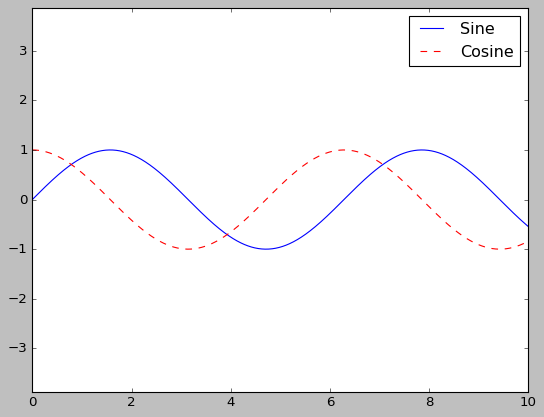

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

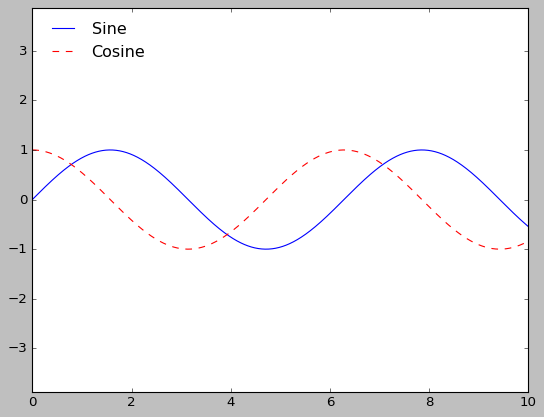

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

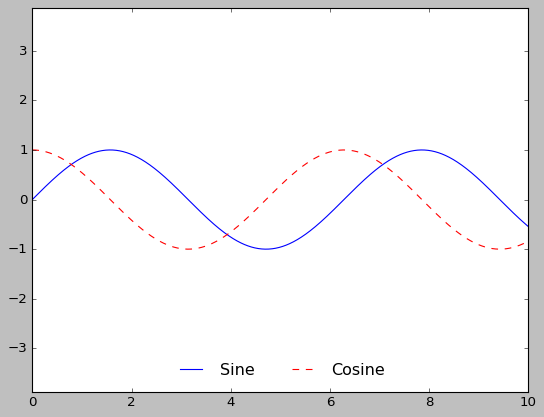

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

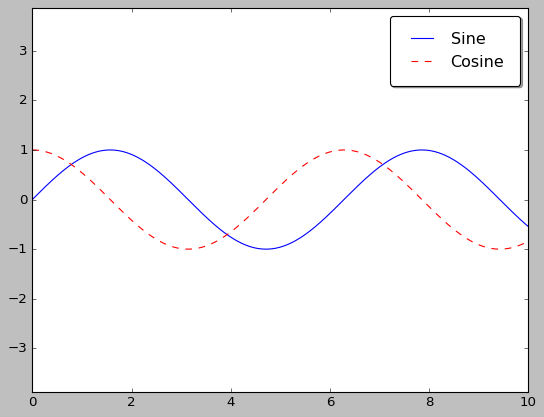

In [6]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### Choosing Elements for the Legend
The plt.plot() command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to plt.legend() will tell it which to identify, along with the labels we'd like to specify:

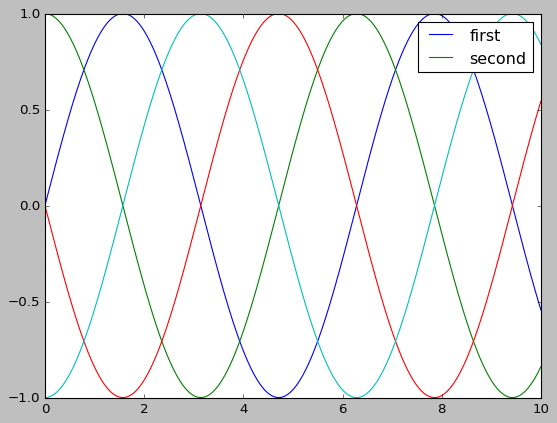

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

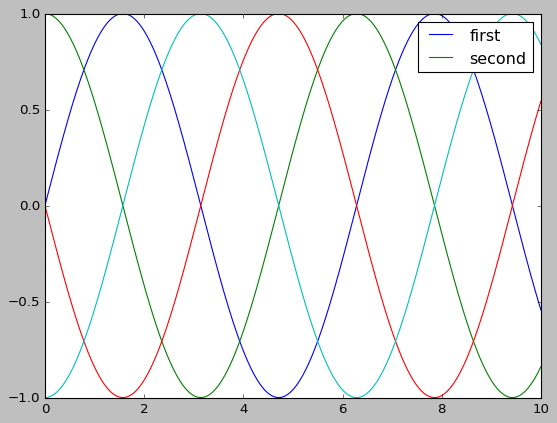

In [8]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

### Legend for Size of Points
Sometimes the legend defaults are not sufficient for the given visualization. For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this. Here is an example where we'll use the size of points to indicate populations of California cities. We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:



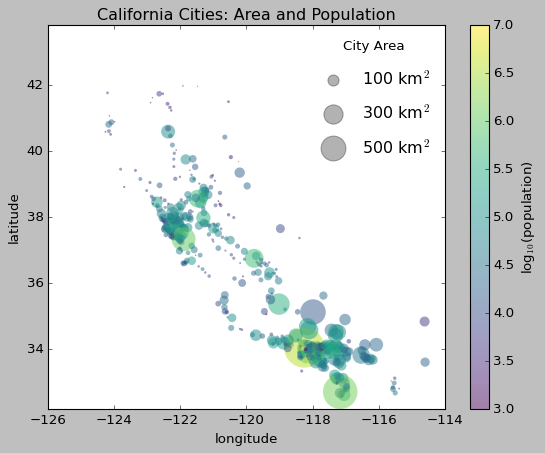

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cities = pd.read_csv('california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)

# Correct way to set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='datalim')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Create a legend for city areas
for area_size in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area_size,
                label=str(area_size) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population')
plt.show()


The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists. Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information. This strategy can be useful for creating more sophisticated visualizations.

### Multiple Legends
Sometimes when designing a plot you'd like to add multiple legends to the same axes. Unfortunately, Matplotlib does not make this easy: via the standard legend interface, it is only possible to create a single legend for the entire plot. If you try to create a second legend using plt.legend() or ax.legend(), it will simply override the first one. We can work around this by creating a new legend artist from scratch, and then using the lower-level ax.add_artist() method to manually add the second artist to the plot:

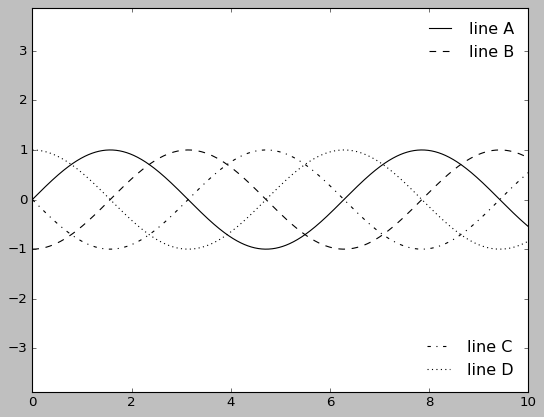

In [11]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);


### Customizing Colorbars


In [12]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [13]:
%matplotlib inline
import numpy as np

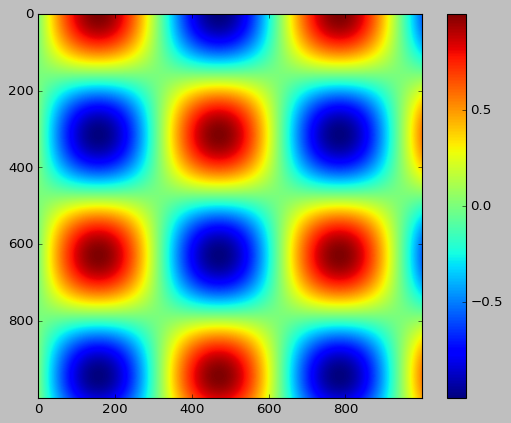

In [14]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

### Customizing Colorbars

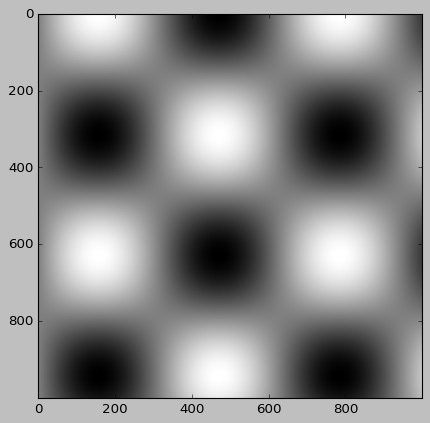

In [15]:
plt.imshow(I, cmap='gray');

### Choosing the Colormap
Broadly, you should be aware of three different categories of colormaps:

- Sequential colormaps: These are made up of one continuous sequence of colors (e.g., binary or viridis).
- Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).
- Qualitative colormaps: these mix colors with no particular sequence (e.g., rainbow or jet).

The jet colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap. Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data. Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the jet colorbar into black and white:

In [16]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\144398497.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\144398497.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)


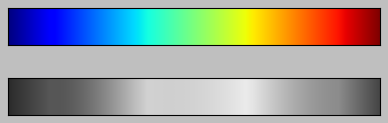

In [17]:
view_colormap('jet')

Notice the bright stripes in the grayscale image. Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset. It's better to use a colormap such as viridis (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range. Thus it not only plays well with our color perception, but also will translate well to grayscale printing:

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\144398497.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\144398497.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)


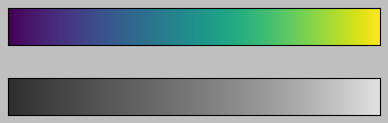

In [18]:
view_colormap('viridis')

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\144398497.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\144398497.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)


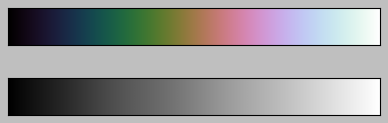

In [19]:
view_colormap('cubehelix')

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\144398497.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\144398497.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap)


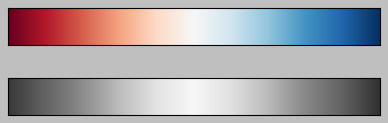

In [20]:
view_colormap('RdBu')

### Color limits and extensions
Matplotlib allows for a large range of colorbar customization. The colorbar itself is simply an instance of plt.Axes, so all of the axes and tick formatting tricks we've learned are applicable. The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the extend property. This might come in handy, for example, if displaying an image that is subject to noise:

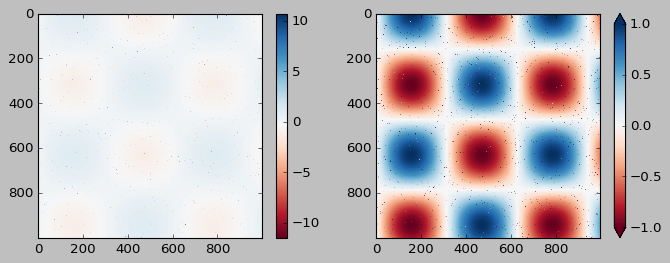

In [21]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in. In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits. The result is a much more useful visualization of our data.

### Discrete Color Bars

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\2420005992.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


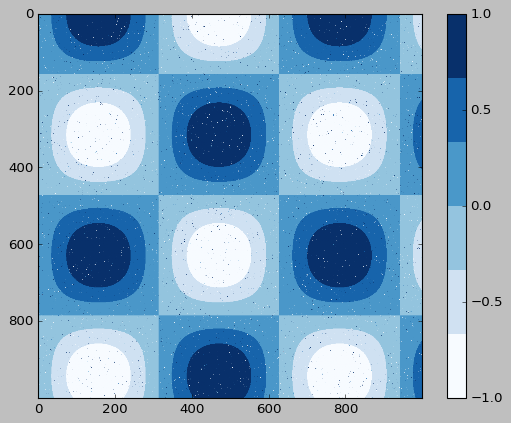

In [22]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

### Example: Handwritten Digits
For an example of where this might be useful, let's look at an interesting visualization of some hand written digits data. This data is included in Scikit-Learn, and consists of nearly 2,000 8×8
 thumbnails showing various hand-written digits.

For now, let's start by downloading the digits data and visualizing several of the example images with plt.imshow():




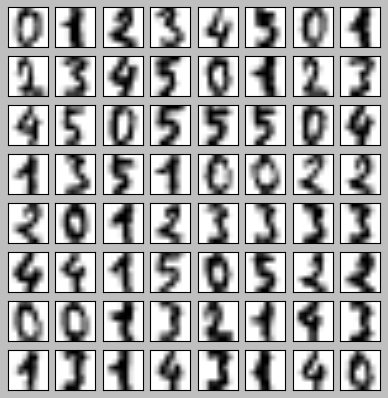

In [23]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])


Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel. But visualizing relationships in such high-dimensional spaces can be extremely difficult. One way to approach this is to use a dimensionality reduction technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest.

In [24]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

c:\Users\Welcome\OneDrive\Documents\AI\Math\venv\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Welcome\OneDrive\Documents\AI\Math\venv\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


C:\Users\Welcome\AppData\Local\Temp\ipykernel_16100\3436243256.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))


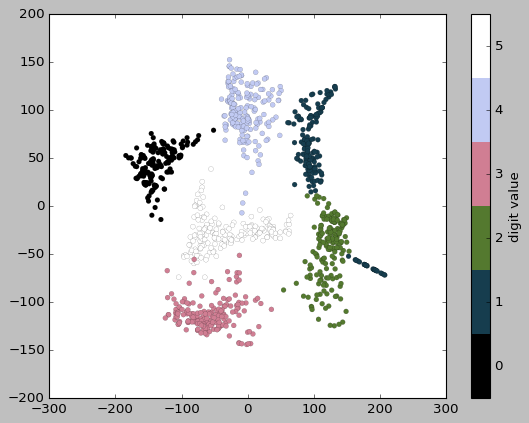

In [25]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

The projection also gives us some interesting insights on the relationships within the dataset: for example, the ranges of 5 and 3 nearly overlap in this projection, indicating that some hand written fives and threes are difficult to distinguish, and therefore more likely to be confused by an automated classification algorithm. Other values, like 0 and 1, are more distantly separated, and therefore much less likely to be confused. This observation agrees with our intuition, because 5 and 3 look much more similar than do 0 and 1.

### Multiple Subplots

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

### plt.axes: Subplots by Hand

The most basic method of creating an axes is to use the plt.axes function. As we've seen previously, by default this creates a standard axes object that fills the entire figure. plt.axes also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent [left, bottom, width, height] in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

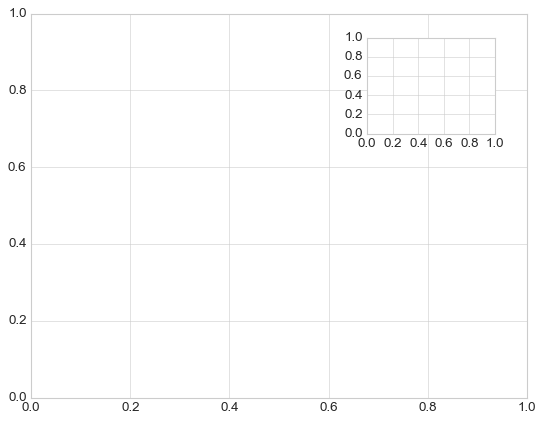

In [28]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

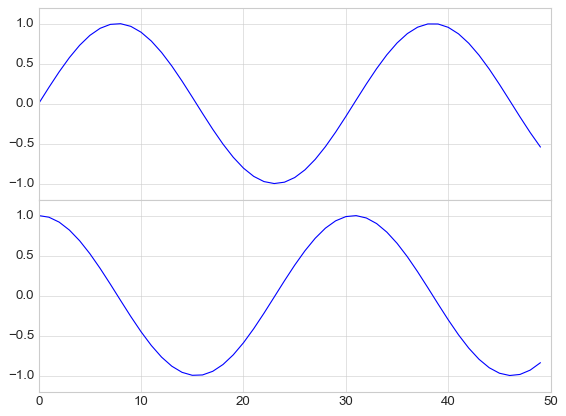

In [29]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

### plt.subplot: Simple Grids of Subplots
Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is plt.subplot(), which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

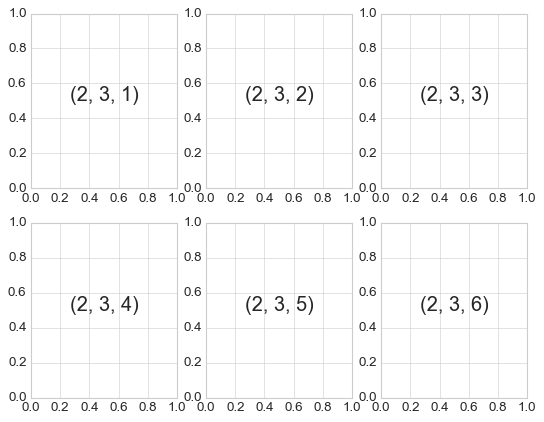

In [30]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

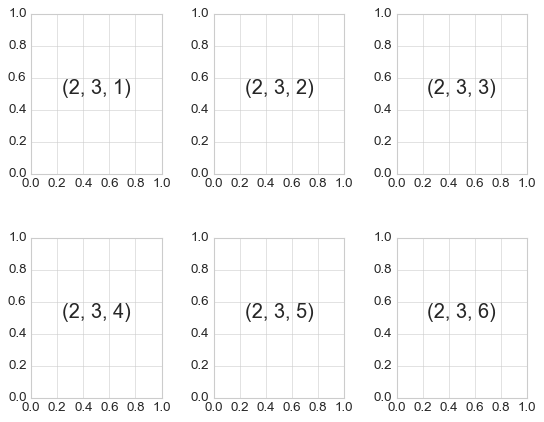

In [31]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the hspace and wspace arguments of plt.subplots_adjust, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

### plt.subplots: The Whole Grid in One Go
The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots. For this purpose, plt.subplots() is the easier tool to use (note the s at the end of subplots). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array. The arguments are the number of rows and number of columns, along with optional keywords sharex and sharey, which allow you to specify the relationships between different axes.

Here we'll create a 2×3
 grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

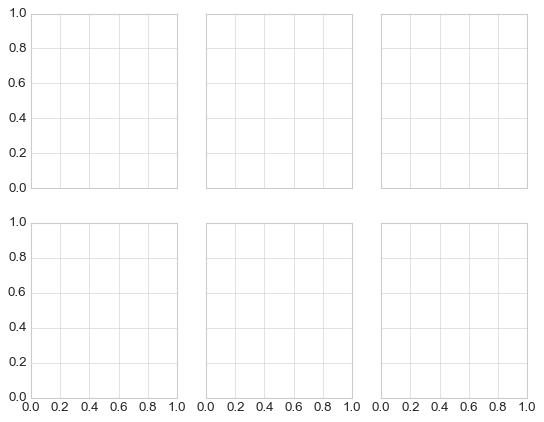

In [32]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

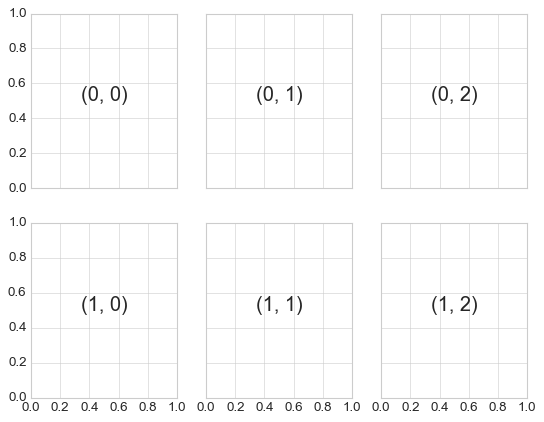

In [33]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

### plt.GridSpec: More Complicated Arrangements
To go beyond a regular grid to subplots that span multiple rows and columns, plt.GridSpec() is the best tool. The plt.GridSpec() object does not create a plot by itself; it is simply a convenient interface that is recognized by the plt.subplot() command. For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

In [34]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

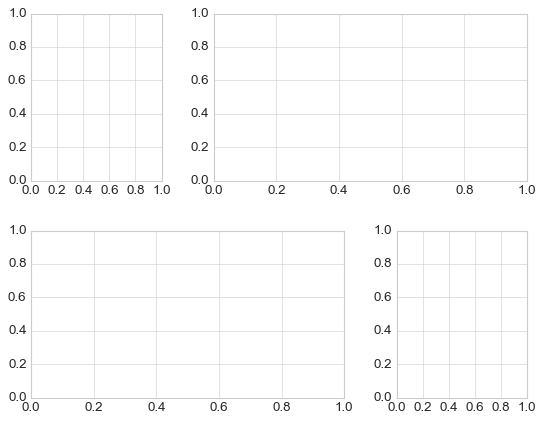

In [35]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

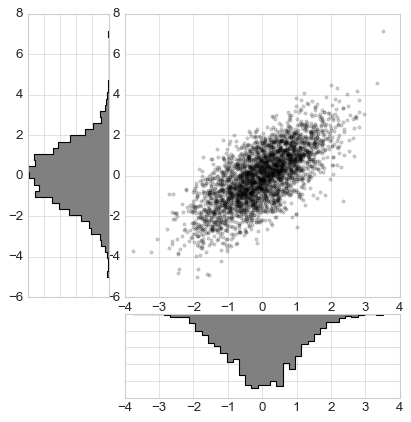

In [36]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

### Text and Annotation
Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and importing the functions we will use:

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

### Example: Effect of Holidays on US Births


In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   243k      0  0:00:01  0:00:01 --:--:--  245k


In [40]:
births = pd.read_csv('births.csv')

# Remove outliers
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

# Create datetime index
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

# Pivot by month and day
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])

# Use pd.Timestamp instead of pd.datetime
births_by_date.index = [pd.Timestamp(2012, month, day)
                        for (month, day) in births_by_date.index]

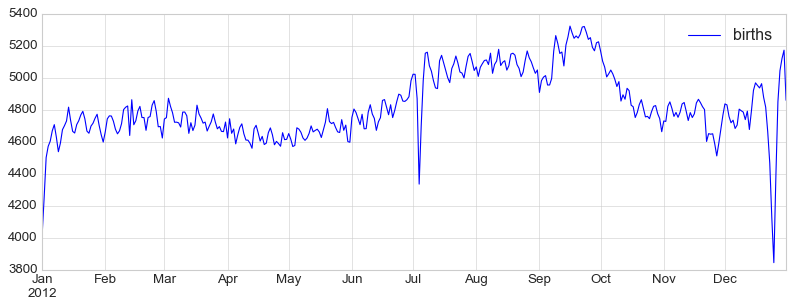

In [41]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention. This can be done manually with the plt.text/ax.text command, which will place text at a particular x/y value:

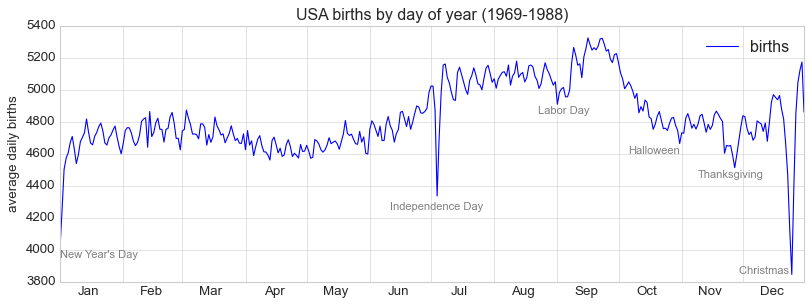

In [42]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The ax.text method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text. Here we used ha='right' and ha='center', where ha is short for horizonal alignment. See the docstring of plt.text() and of mpl.text.Text() for more information on available options.

### Transforms and Text Position
In the previous example, we have anchored our text annotations to data locations. Sometimes it's preferable to anchor the text to a position on the axes or figure, independent of the data. In Matplotlib, this is done by modifying the transform.

Any graphics display framework needs some scheme for translating between coordinate systems. For example, a data point at (x,y)=(1,1)
 needs to somehow be represented at a certain location on the figure, which in turn needs to be represented in pixels on the screen. Mathematically, such coordinate transformations are relatively straightforward, and Matplotlib has a well-developed set of tools that it uses internally to perform them (these tools can be explored in the matplotlib.transforms submodule).

The average user rarely needs to worry about the details of these transforms, but it is helpful knowledge to have when considering the placement of text on a figure. There are three pre-defined transforms that can be useful in this situation:

- ax.transData: Transform associated with data coordinates
- ax.transAxes: Transform associated with the axes (in units of axes dimensions)
- fig.transFigure: Transform associated with the figure (in units of figure dimensions)

Here let's look at an example of drawing text at various locations using these transforms:

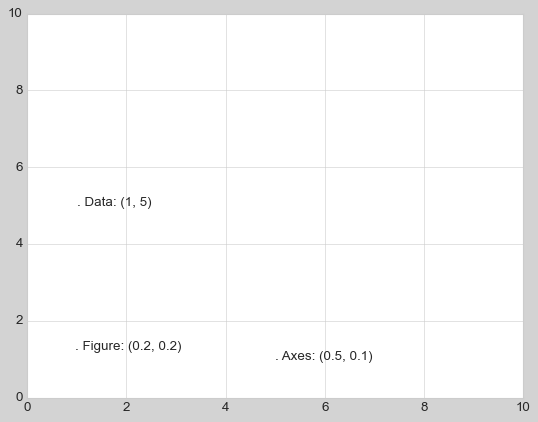

In [43]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

Note that by default, the text is aligned above and to the left of the specified coordinates: here the "." at the beginning of each string will approximately mark the given coordinate location.

The transData coordinates give the usual data coordinates associated with the x- and y-axis labels. The transAxes coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size. The transFigure coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.

Notice now that if we change the axes limits, it is only the transData coordinates that will be affected, while the others remain stationary:

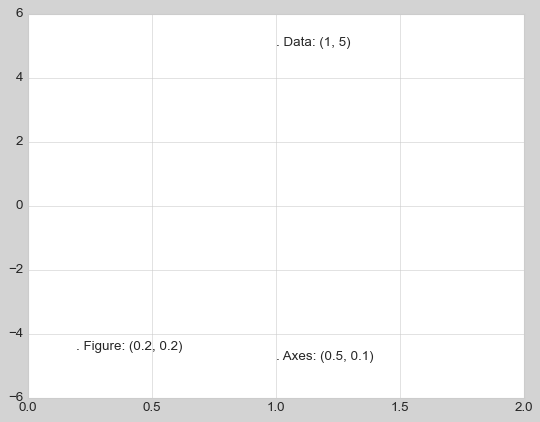

In [44]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

### Arrows and Annotation
Along with tick marks and text, another useful annotation mark is the simple arrow.

Drawing arrows in Matplotlib is often much harder than you'd bargain for. While there is a plt.arrow() function available, I wouldn't suggest using it: the arrows it creates are SVG objects that will be subject to the varying aspect ratio of your plots, and the result is rarely what the user intended. Instead, I'd suggest using the plt.annotate() function. This function creates some text and an arrow, and the arrows can be very flexibly specified.

Here we'll use annotate with several of its options:

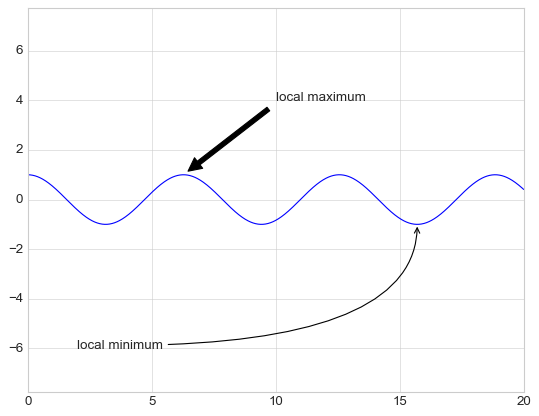

In [45]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

The arrow style is controlled through the arrowprops dictionary, which has numerous options available. These options are fairly well-documented in Matplotlib's online documentation, so rather than repeating them here it is probably more useful to quickly show some of the possibilities. Let's demonstrate several of the possible options using the birthrate plot from before:

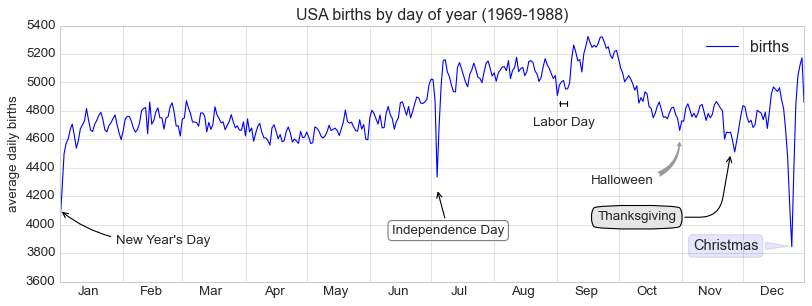

In [46]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

You'll notice that the specifications of the arrows and text boxes are very detailed: this gives you the power to create nearly any arrow style you wish. Unfortunately, it also means that these sorts of features often must be manually tweaked, a process that can be very time consuming when producing publication-quality graphics! Finally, I'll note that the preceding mix of styles is by no means best practice for presenting data, but rather included as a demonstration of some of the available options.